In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Files to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data 
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)


In [31]:
# View the mouse data
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [32]:
# View the clinical trial data
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [33]:
# Combine the data into a single dataset
df = pd.merge(mouse_data, trial_data, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df = df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug"]]

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [34]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
df_size=df[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).mean()

# Preview DataFrame
df_size.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_err=df[["Drug","Timepoint","Tumor Volume (mm3)"]].groupby(["Drug","Timepoint"]).sem()

# Preview DataFrame
df_err.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [36]:
# Minor Data Munging to Re-Format the size data
df_size_pivot=pd.pivot_table(df_size,index="Timepoint", columns=["Drug"] )
df_size_pivot.columns = df_size_pivot.columns.droplevel()

df_size_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [37]:
# Minor Data Munging to Re-Format the error data
df_err_pivot=pd.pivot_table(df_err,index="Timepoint", columns=["Drug"] )
df_err_pivot.columns = df_err_pivot.columns.droplevel()

df_err_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [38]:
# Keep only four drugs (and placebo) for the study (using a slice)
dfp_size=df_size_pivot[["Capomulin","Ceftamin","Infubinol","Ketapril","Placebo"]] 
dfp_size.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,47.125589
10,43.084291,48.285125,49.403909,49.582269,49.423329
15,42.064317,50.094055,51.296397,52.399974,51.359742
20,40.716325,52.157049,53.197691,54.920935,54.364417


In [39]:
# Keep only five drugs for the study (using iloc)
dfp_err=df_err_pivot.iloc[:,[0,1,2,3,5]]
dfp_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.218091
10,0.702684,0.236144,0.282346,0.357421,0.402064
15,0.838617,0.332053,0.357705,0.580268,0.614461
20,0.909731,0.359482,0.476210,0.726484,0.839609


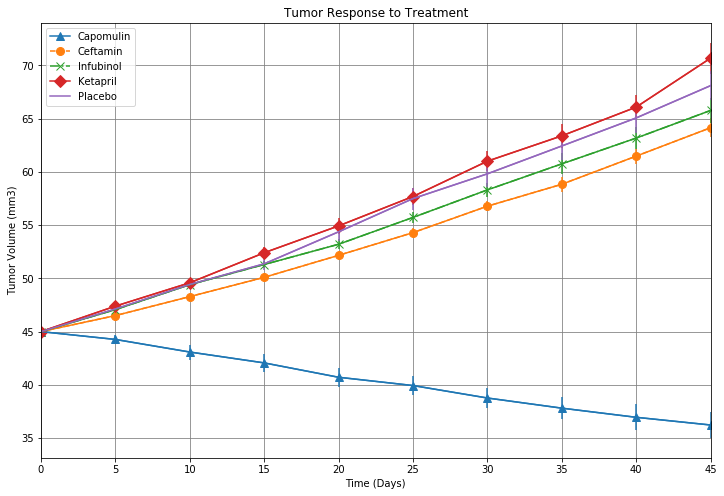

In [40]:
# Generate Plot (with Error Bars)

#plot lines and error bars (and return the axes for the new plot)
ax = dfp_size.plot(figsize=(12,8), yerr = dfp_err, legend = False)

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

#plot the markers
dfp_size.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=8, ax = ax)

#complete formatting the plot 
plt.title('Tumor Response to Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle='-', color = 'gray')
plt.legend(dfp_size.columns.tolist())

plt.savefig('data/Tumor_Response_To_Treatment.pdf')

In [41]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
dfm_size=df[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).mean()

# Preview DataFrame
dfm_size.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [43]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
dfm_err=df[["Drug","Timepoint","Metastatic Sites"]].groupby(["Drug","Timepoint"]).sem()

# Preview DataFrames
dfm_err.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [44]:
# Minor Data Munging to Re-Format the Data Frames
dfm_size_pivot=pd.pivot_table(dfm_size,index="Timepoint", columns=["Drug"] )
dfm_size_pivot.columns = dfm_size_pivot.columns.droplevel()

# Keep only five drugs for the study (using iloc)
dfm_size=dfm_size_pivot.iloc[:,[0,1,2,3,5]]
dfm_size.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.375000
10,0.320000,0.600000,0.666667,0.590909,0.833333
15,0.375000,0.789474,0.904762,0.842105,1.250000
20,0.652174,1.111111,1.050000,1.210526,1.526316


In [45]:
# Minor Data Munging to Re-Format the Data Frames
dfm_err_pivot=pd.pivot_table(dfm_err,index="Timepoint", columns=["Drug"] )
dfm_err_pivot.columns = dfm_err_pivot.columns.droplevel()

# Keep only four drugs (and placebo) for the study (using loc)
dfm_err=dfm_err_pivot.loc[:,["Capomulin","Ceftamin","Infubinol","Ketapril","Placebo"]]
dfm_err.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.100947
10,0.125433,0.152177,0.159364,0.142018,0.115261
15,0.132048,0.180625,0.194015,0.191381,0.190221
20,0.161621,0.241034,0.234801,0.236680,0.234064


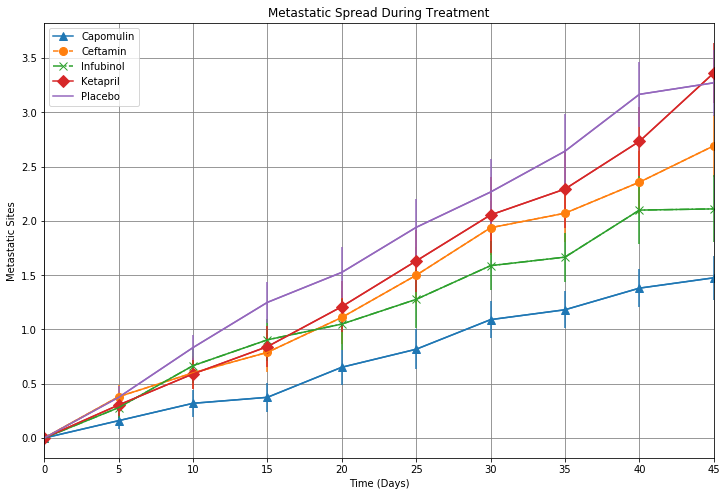

In [46]:
# Generate Plot (with Error Bars)

#plot lines and error bars
ax = dfm_size.plot(figsize=(12,8), yerr = dfm_err, legend = False)

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

#plot the markers
dfm_size.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=8, ax = ax)

#complete formatting the plot
plt.title('Metastatic Spread During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(linestyle='-', color = 'gray')
plt.legend(dfm_size.columns.tolist())

plt.savefig('data/Metastatic_Spread_During_Treatment.pdf')

In [47]:
# Show the Figure
plt.show()

## Survival Rates

In [48]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_sur=df[["Drug","Timepoint","Mouse ID"]].groupby(["Drug","Timepoint"]).count()

# Preview DataFrame
df_sur.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [49]:
# Minor Data Munging to Re-Format the Data Frames
df_sur_pivot=pd.pivot_table(df_sur,index="Timepoint", columns=["Drug"] )
df_sur_pivot.columns = df_sur_pivot.columns.droplevel()

# Keep only five drugs for the study (using iloc)
df_sur=df_sur_pivot.iloc[:,[0,1,2,3,5]]

# Preview the Data Frame
df_sur.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,25,25,25,25,25
5,25,21,25,23,24
10,25,20,21,22,24
15,24,19,21,19,20
20,23,18,20,19,19


In [50]:
# Determine percentages of survival based on count at Timepoint = 0
# Store values at Timepoint = 0
df_0 = df_sur.iloc[0,:]

# Calculate percentages based on ratio to df_0 
df_sur = 100*df_sur/df_0

# verify percentages
df_sur.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo
Timepoint,,,,,
0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,96.0
10,100.0,80.0,84.0,88.0,96.0
15,96.0,76.0,84.0,76.0,80.0
20,92.0,72.0,80.0,76.0,76.0


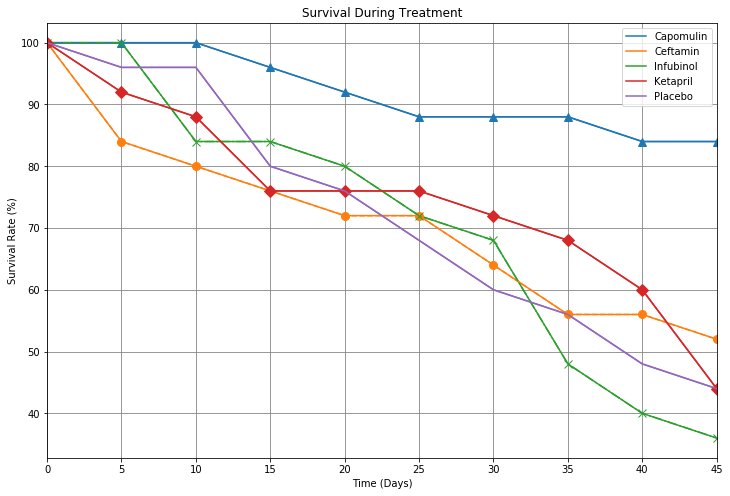

In [51]:
# Generate the Plot (Accounting for percentages)

#plot lines and error bars
ax = df_sur.plot(figsize=(12,8), legend = False)

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)

#plot the markers
df_sur.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=8, ax = ax)

#complete formatting the plot
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(linestyle='-', color = 'gray')
plt.legend(df_sur.columns.tolist())

plt.savefig('data/Survival_During_Treatment.pdf')

In [52]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug

# Get starting size for each drug
df_start = df[df["Timepoint"]==0]
df_start_avg=df_start[["Drug","Tumor Volume (mm3)"]].groupby(["Drug"]).mean()
df_start_avg.rename(columns={"Tumor Volume (mm3)": "Original_Size"},inplace=True)

# Get last Timepoint value
study_end = max(df["Timepoint"])

# Get final size for each drug
df_end = df[df["Timepoint"]==study_end]
df_start_avg.head()
df_end_avg=df_end[["Drug","Tumor Volume (mm3)"]].groupby(["Drug"]).mean()
df_end_avg.rename(columns={"Tumor Volume (mm3)": "Final_Size"},inplace=True)

# Merge starting/ending results and calculate the percentage of original size
df_total = pd.merge(df_start_avg, df_end_avg, how="inner", on=["Drug"])
df_total["Percent_Change"] = 100*(df_total["Final_Size"] - df_total["Original_Size"])/df_total["Original_Size"]

In [54]:
df_total.head(10)

,Original_Size,Final_Size,Percent_Change
Drug,,,
Capomulin,45.0,36.236114,-19.475303
Ceftamin,45.0,64.132421,42.516492
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Naftisol,45.0,69.265506,53.923347
Placebo,45.0,68.084082,51.297960
Propriva,45.0,66.258529,47.241175
Ramicane,45.0,34.955595,-22.320900
Stelasyn,45.0,68.438310,52.085134


In [55]:
# Store all Relevant Percent Changes into a Tuple

def bar_color (row):
   if row['Percent_Change'] < 0:
       y = 'green'
   else:
       y = 'red'
   if row['Drug'] == "Placebo":
       y = "gray"
   return y


drugs = df_total.index.values

#df_total["Bigger"] = df_total["Percent_Change"] > 0
df_total["Drug"] = df_total.index
df_total["Bigger"] = df_total[['Percent_Change', 'Drug']].apply(bar_color, axis=1)
#df_total["Bigger"]=df_total.apply(bar_color, axis=1)

In [56]:
# Preview the results
df_total.head()

,Original_Size,Final_Size,Percent_Change,Drug,Bigger
Drug,,,,,
Capomulin,45.0,36.236114,-19.475303,Capomulin,green
Ceftamin,45.0,64.132421,42.516492,Ceftamin,red
Infubinol,45.0,65.755562,46.123472,Infubinol,red
Ketapril,45.0,70.662958,57.028795,Ketapril,red
Naftisol,45.0,69.265506,53.923347,Naftisol,red


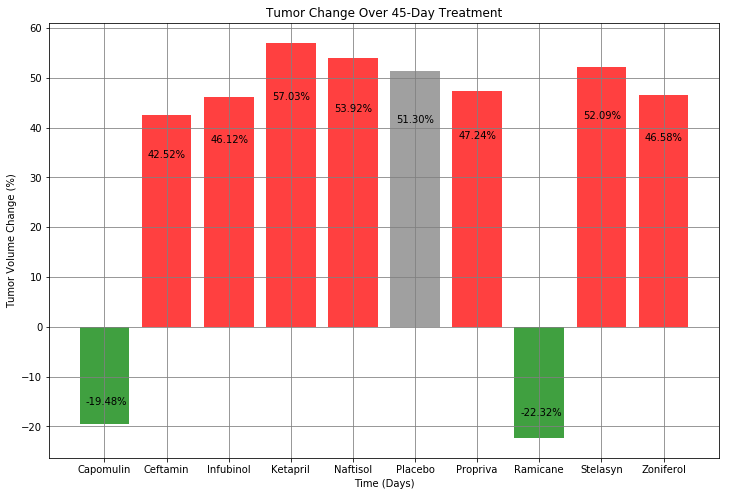

In [57]:
# Set up bar graph (I am including all drugs in this part of the homework)
fig = plt.figure(figsize=(12,8))
plt.bar(drugs, df_total["Percent_Change"], align='center', alpha=.75, color=df_total["Bigger"] )

# Plot the labels
for i in range(len(drugs)):
  plt.text(i -.30 , .8*df_total.iloc[i,2], "{:.2f}%".format(df_total.iloc[i,2]))

##complete formatting the plot
plt.title('Tumor Change Over 45-Day Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume Change (%)")
plt.grid(linestyle='-', color = 'gray')

# Instead of showing online only, save the file for possible presentation

plt.savefig('data/Summary_Graph_Bar.pdf')

In [58]:
# Run the t-test against the placebo (control) for the two most promising drugs
Placebo = df.loc[(df["Timepoint"] == 45) & (df["Drug"] == "Placebo"),["Tumor Volume (mm3)"]]
Capomulin = df.loc[(df["Timepoint"] == 45) & (df["Drug"] == "Capomulin"),["Tumor Volume (mm3)"]]
Ramicane = df.loc[(df["Timepoint"] == 45) & (df["Drug"] == "Ramicane"),["Tumor Volume (mm3)"]]

(t_stat, p) = stats.ttest_ind(Capomulin, Placebo, equal_var=False)
print ("Results for Capomulin")
print (f"t-statistic: {'{:,.2f}'.format(float(t_stat))}")
print (f"p-value: {p}")
       
print ()

(t_stat, p) = stats.ttest_ind(Ramicane, Placebo, equal_var=False)
print ("Results for Ramicane")
print (f"t-statistic: {'{:,.2f}'.format(float(t_stat))}")
print (f"p-value: {p}")

Results for Capomulin
t-statistic: -17.46
p-value: [1.92603524e-15]

Results for Ramicane
t-statistic: -18.15
p-value: [1.01981845e-15]


# Conclusion #
 * Capomulin offers significant reduction in tumor size compared to the placebo sample. The difference is statistically significant.
 * Without treatment, survival rate was about 50\% after 45 days of study.
 * Without treatment, there are on average about 3.0 metastasic sites after 45 days of study.